In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = ('C:\\Users\\Abe\\Data Science Bootcamp\\Unit 2\\Naive Bayes Guided Example\\SMSSpamCollection.txt')

df = pd.read_table(file, header=None)
df.columns = ['spam','message']
df.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Turn spam column into boolian 
df['spam'] = df['spam'] == 'spam'

In [4]:
keywords = ['click','offer', 'winner', 'buy', 'free', 'cash', 'urgent']

# Creating a column for each word in keywords where there is a space before
# and after the word
for key in keywords:
    df[str(key)] = df.message.str.contains(str(key),case=False)

# Create a column if the message is in all caps
df['upper'] = df['message'].str.isupper()

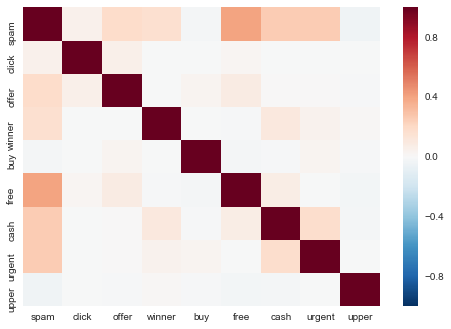

In [5]:
# Check correlation between features
sns.heatmap(df.corr())
plt.show()

In [6]:
# Set target to be predicted and data to predict
data = df[keywords + ['upper']]
target = df['spam']

In [12]:
# Because data is binary/boolean we will use Bernoulli model
from sklearn.naive_bayes import BernoulliNB

# Store model in a variable
bnb = BernoulliNB()

# Fit model to the data
bnb.fit(data,target)

# Classify and store outcome to a new variable
y_pred = bnb.predict(data)

print ('Out of a total of {} we have {} incorrect predictions for a ratio of {:.2f}'.format(
    df.shape[0],
    (y_pred != target).sum(),
    (y_pred != target).sum() / df.shape[0]
    ))

Out of a total of 5572 we have 501 incorrect predictions for a ratio of 0.09
